# Problem Statement 

Viewers spend hours scrolling through hundred's of anime's sometimes finding what they like but sometimes not.
This is to provide viewrs suggestions based on their likes and create a better streaming environment that increases time spent on website

In [1]:
#importing necessary libraries
import pandas as pd
import numpy as np

#visulization phase
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
import matplotlib.pylab as pylab
%matplotlib inline
pd.set_option('display.max_columns', 500)
mpl.style.use('ggplot')
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 12,8

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
anime_data = pd.read_csv('anime.csv')
rating_data = pd.read_csv('rating.csv')

In [3]:
print('The shape of the data is (row, columns): ' + str(anime_data.shape))
print(anime_data.info())

The shape of the data is (row, columns): (12294, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB
None


In [4]:
print('The shape of the data is (row, column): ' + str(rating_data.shape))
print(rating_data.info())

The shape of the data is (row, column): (7813737, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813737 entries, 0 to 7813736
Data columns (total 3 columns):
 #   Column    Dtype
---  ------    -----
 0   user_id   int64
 1   anime_id  int64
 2   rating    int64
dtypes: int64(3)
memory usage: 178.8 MB
None


## Merging Dataframes - Fusion

In [5]:
anime_fulldata = pd.merge(anime_data, rating_data, on='anime_id',
                         suffixes=['','_user'])
anime_fulldata = anime_fulldata.rename(columns={'name': 'anime_title',
                                               'rating_user': 'user_rating'})

In [6]:
anime_fulldata.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,-1


## Analyze the data - Byakugan
Top 10 anime based on rating counts

Text(0, 0.5, 'User Rating Count')

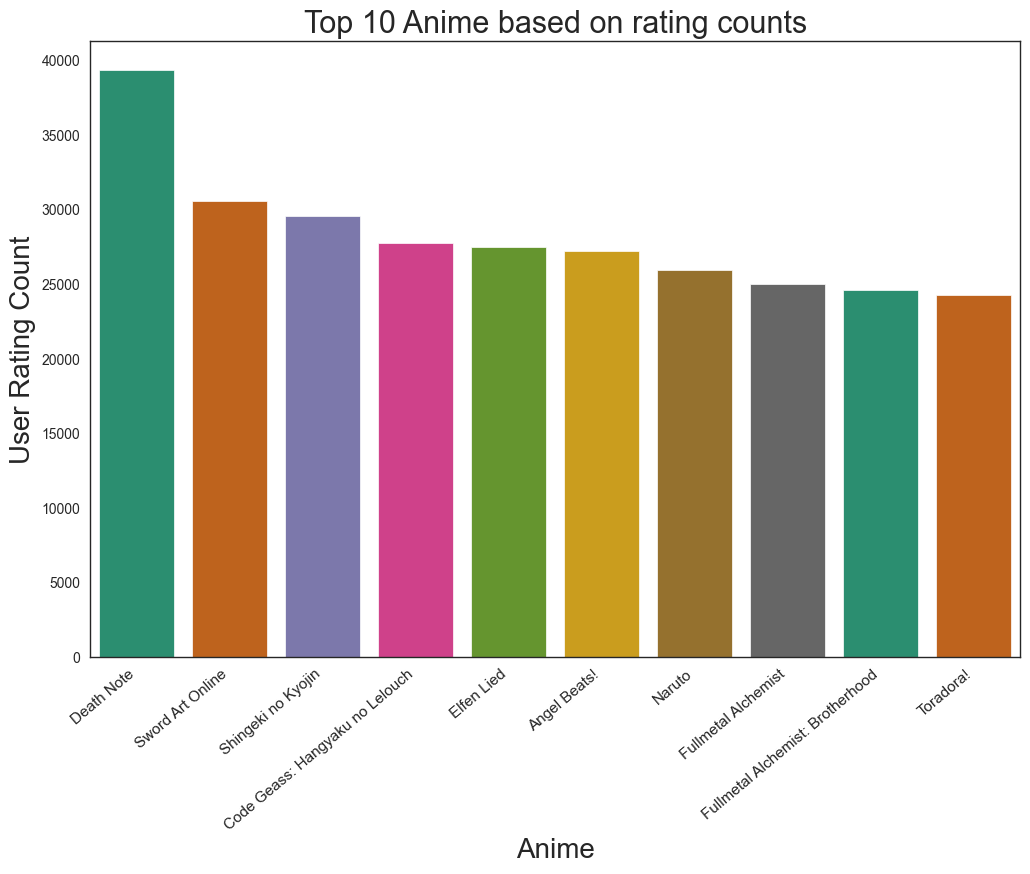

In [7]:
# Creating a dataframe for rating counts
combine_anime_rating = anime_fulldata.dropna(axis=0, subset=['anime_title'])
anime_ratingCount = (combine_anime_rating.
     groupby(by = ['anime_title'])['user_rating'].
     count().
     reset_index().rename(columns = {'rating': 'totalRatingCount'})
    [['anime_title', 'user_rating']]
    )


top10_animerating=anime_ratingCount[['anime_title', 'user_rating']].sort_values(by = 'user_rating',ascending = False).head(10)
ax=sns.barplot(x="anime_title", y="user_rating", data=top10_animerating, palette="Dark2")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha="right")
ax.set_title('Top 10 Anime based on rating counts', fontsize=22)
ax.set_xlabel('Anime', fontsize=20)
ax.set_ylabel('User Rating Count', fontsize=20)

In [8]:
anime_fulldata = anime_fulldata.merge(anime_ratingCount, left_on = 'anime_title', right_on = 'anime_title', how = 'left')
anime_fulldata = anime_fulldata.rename(columns={'user_rating_x': 'user_rating', 'user_rating_y': 'totalratingcount'})

## Top 10 Anime based on community size

In [9]:
duplicate_anime = anime_fulldata.copy()
duplicate_anime.drop_duplicates(subset='anime_title',
                               keep='first',
                               inplace=True)

Text(0, 0.5, 'Community Size')

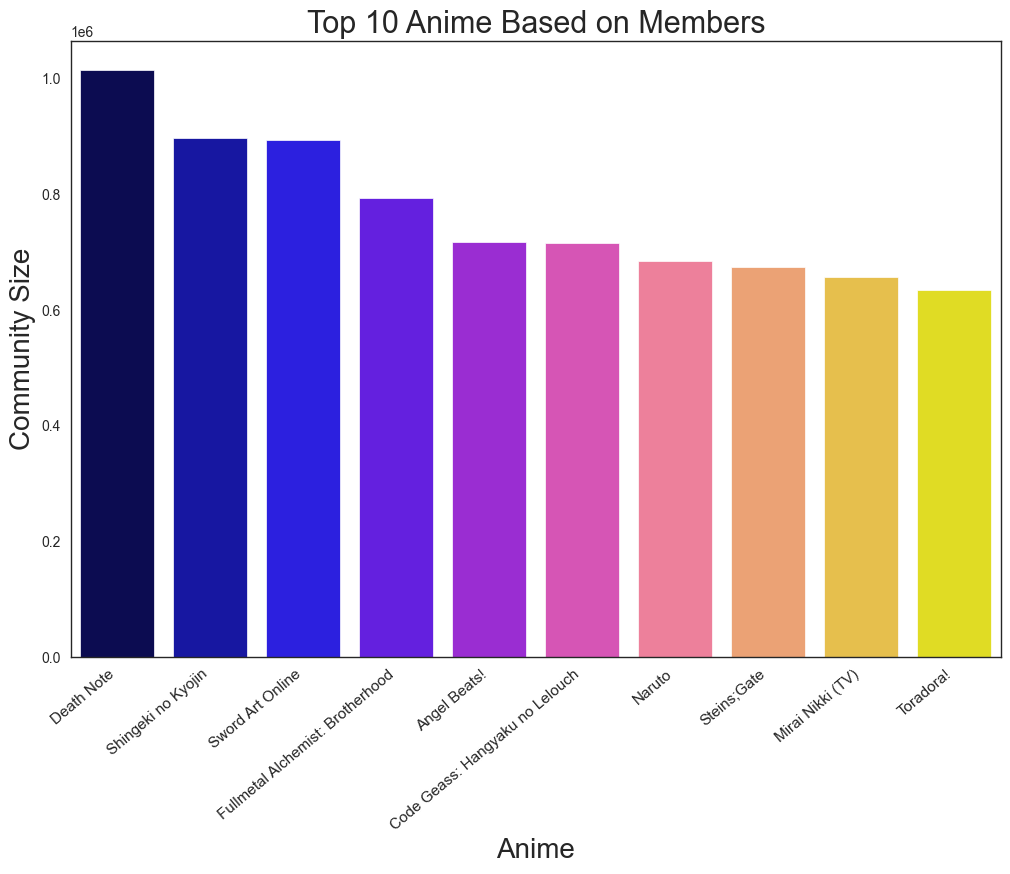

In [10]:
top10_animemembers = duplicate_anime[['anime_title', 'members']].sort_values(by='members', ascending=False).head(10)
ax=sns.barplot(x='anime_title', y='members', data=top10_animemembers, palette='gnuplot2')
ax.set_xticklabels(ax.get_xticklabels(), fontsize=11, rotation=40, ha='right')
ax.set_title('Top 10 Anime Based on Members', fontsize=22)
ax.set_xlabel('Anime', fontsize=20)
ax.set_ylabel('Community Size', fontsize=20)

## Distribution of Rating

Text(0.5, 1.0, 'Rating of Users')

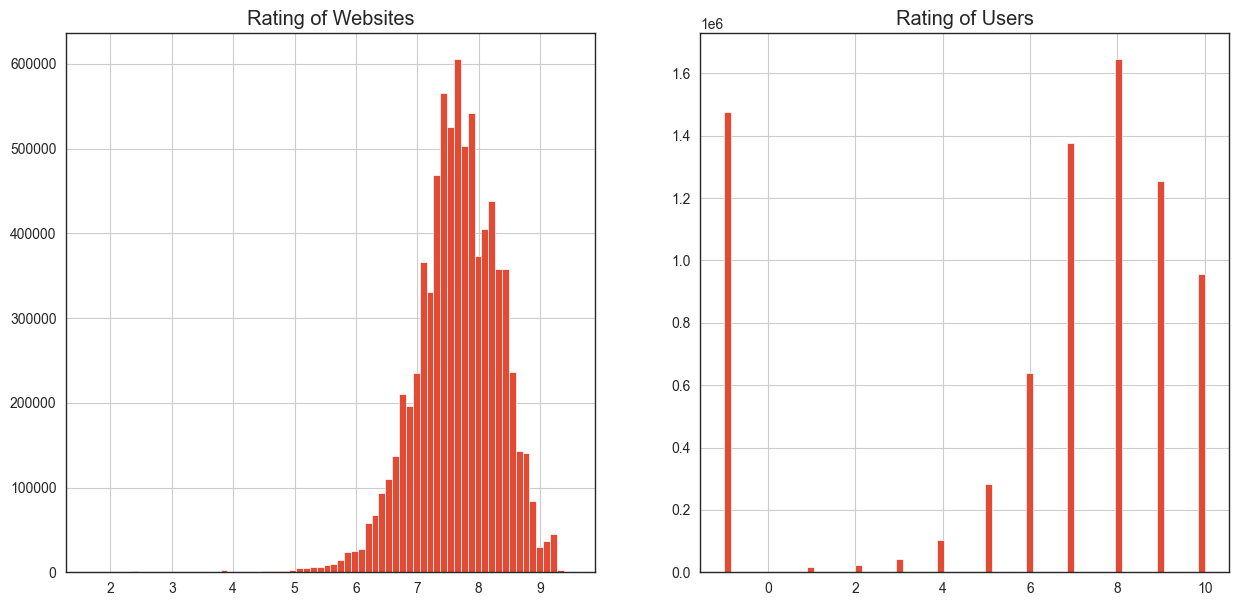

In [11]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
anime_fulldata['rating'].hist(bins=70)
plt.title('Rating of Websites')
plt.subplot(1,2,2)
anime_fulldata['user_rating'].hist(bins=70)
plt.title('Rating of Users')

## Medium of Streaming

In [13]:
import plotly.graph_objects as go
labels = anime_fulldata['type'].value_counts().index
values = anime_fulldata['type'].value_counts().values
colors = ['gold','mediumturquoise','darkorange','lightgreen']
fig=go.Figure(data=[go.Pie(labels=labels,
                          values=values)])
fig.update_traces(hoverinfo='label+percent', textinfo='value', textfont_size=20,
                  marker=dict(colors=colors, line=dict(color='#000000', width=2)))
fig.update_layout(title={
    'text': 'Medium of Streaming',
    'y': 0.9,
    'x': 0.5,
    'xanchor': 'center',
    'yanchor': 'top'
})
fig.show()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'hoverinfo': 'label+percent',
              'labels': array(['TV', 'Movie', 'OVA', 'Special', 'ONA', 'Music'], dtype=object),
              'marker': {'colors': [gold, mediumturquoise, darkorange, lightgreen],
                         'line': {'color': '#000000', 'width': 2}},
              'textfont': {'size': 20},
              'textinfo': 'value',
              'type': 'pie',
              'values': array([5283596, 1051998,  800307,  559366,   91956,   26500], dtype=int64)}],
    'layout': {'template': '...',
               'title': {'text': 'Medium of Streaming', 'x': 0.5, 'xanchor': 'center', 'y': 0.9, 'yanchor': 'top'}}
})

(-0.5, 799.5, 399.5, -0.5)

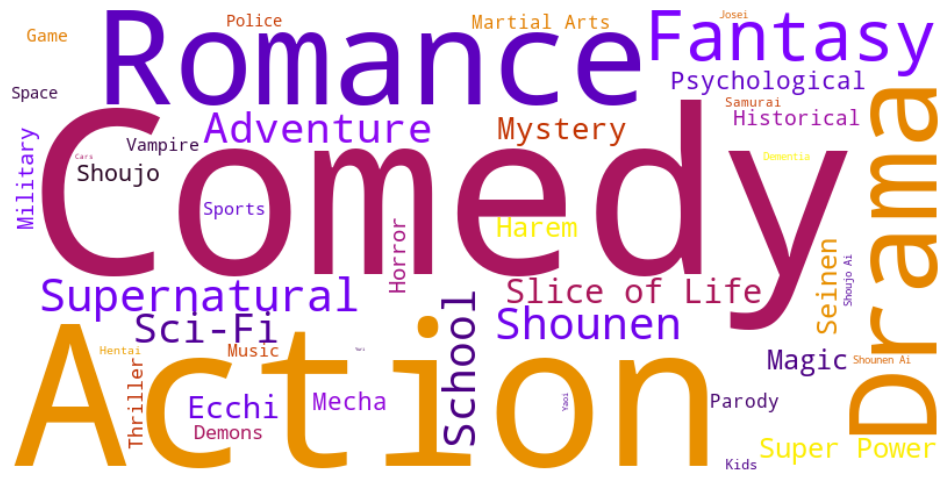

In [13]:
nonull_anime=anime_fulldata.copy()
nonull_anime.dropna(inplace=True)
from collections import defaultdict

all_genres = defaultdict(int)

for genres in nonull_anime['genre']:
    for genre in genres.split(','):
        all_genres[genre.strip()] += 1
        
from wordcloud import WordCloud

genres_cloud = WordCloud(width=800, height=400, background_color='white', colormap='gnuplot').generate_from_frequencies(all_genres)
plt.imshow(genres_cloud, interpolation='bilinear')
plt.axis('off')

## Preparing Data for Consumption

In [14]:
anime_feature = anime_fulldata.copy()
anime_feature['user_rating'].replace({-1: np.nan}, inplace=True)
anime_feature.head()

,anime_id,anime_title,genre,type,episodes,rating,members,user_id,user_rating,totalratingcount
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,99,5.0,2199
1,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,152,10.0,2199
2,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,244,10.0,2199
3,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,271,10.0,2199
4,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630,278,NaN,2199


In [15]:
anime_feature = anime_feature.dropna(axis=0, how='any')
anime_feature.isnull().sum()

anime_id            0
anime_title         0
genre               0
type                0
episodes            0
rating              0
members             0
user_id             0
user_rating         0
totalratingcount    0
dtype: int64

In [16]:
anime_feature['user_id'].value_counts()

42635    3747
53698    2905
57620    2689
59643    2632
51693    2620
         ... 
41324       1
11199       1
19041       1
26082       1
62930       1
Name: user_id, Length: 69600, dtype: int64

In [17]:
counts = anime_feature['user_id'].value_counts()
anime_feature = anime_feature[anime_feature['user_id'].isin(counts[counts >= 200].index)]

In [18]:
anime_pivot = anime_feature.pivot_table(index='anime_title', columns='user_id',values='user_rating').fillna(0)
anime_pivot.head()

user_id,5,7,17,38,43,46,123,129,139,160,210,226,233,235,244,248,250,256,261,271,282,288,294,301,308,317,321,326,341,352,385,392,395,418,428,436,438,439,446,455,460,462,478,492,497,500,511,529,530,531,540,541,547,551,553,565,567,572,573,578,585,593,598,611,634,637,656,659,660,661,662,670,680,687,692,694,702,721,735,741,746,750,762,768,771,774,783,784,786,795,799,806,813,814,819,820,847,861,890,894,916,920,926,936,937,943,946,954,958,963,979,995,996,1013,1019,1020,1031,1044,1058,1084,1103,1114,1116,1119,1132,1140,1145,1163,1169,1176,1190,1191,1195,1202,1210,1213,1216,1222,1223,1235,1237,1244,1274,1280,1284,1287,1306,1309,1324,1327,1332,1344,1349,1354,1366,1378,1396,1400,1404,1410,1418,1419,1425,1435,1441,1442,1450,1456,1482,1497,1501,1504,1522,1530,1541,1549,1551,1558,1570,1576,1578,1585,1589,1600,1605,1619,1620,1623,1647,1651,1689,1695,1697,1701,1705,1711,1720,1734,1737,1753,1771,1786,1788,1797,1798,1807,1811,1822,1835,1842,1843,1844,1847,1853,1854,1888,1890,1913,1918,1929,1937,1938,1947,1954,1957,1963,1984,1987,2016,2021,2025,2050,2102,2113,2115,2118,2125,2141,2165,2194,2200,2204,2212,2246,2268,2273,2290,2297,2298,2300,...,70832,70838,70839,70842,70844,70879,70881,70884,70888,70931,70938,70953,70961,70998,71008,71016,71021,71029,71078,71115,71118,71122,71178,71184,71198,71212,71224,71225,71226,71231,71250,71252,71253,71278,71284,71300,71302,71330,71339,71362,71363,71377,71429,71435,71438,71453,71456,71466,71491,71498,71508,71529,71537,71564,71573,71607,71610,71619,71632,71655,71673,71699,71731,71739,71749,71754,71766,71770,71780,71790,71792,71794,71796,71804,71808,71812,71816,71817,71821,71822,71844,71850,71854,71862,71877,71882,71893,71896,71898,71901,71908,71932,71942,71943,71945,71947,71951,71968,71971,71973,71974,71977,71984,71999,72007,72021,72035,72042,72043,72049,72052,72059,72060,72095,72107,72115,72126,72130,72196,72254,72263,72264,72268,72294,72305,72306,72317,72329,72400,72404,72409,72468,72511,72512,72516,72520,72526,72528,72541,72549,72554,72610,72627,72630,72646,72661,72663,72677,72685,72694,72715,72759,72760,72767,72776,72786,72787,72789,72800,72811,72814,72817,72846,72857,72872,72875,72884,72889,72928,72941,72945,72946,72947,72954,72959,72960,72968,72997,73005,73012,73031,73058,73070,73073,73075,73086,73088,73099,73101,73111,73114,73123,73132,73135,73152,73153,73155,73159,73160,73162,73177,73179,73188,73193,73197,73203,73212,73216,73221,73234,73248,73251,73257,73260,73262,73264,73272,73276,73278,73282,73284,73286,73288,73301,73317,73320,73328,73329,73340,73341,73343,73346,73356,73359,73362,73378,73379,73380,73389,73395,73406,73417,73422,73457,73460,73476,73499,73502,73503,73507
anime_title,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
&quot;0&quot;,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [19]:
from scipy.sparse import csr_matrix
anime_matrix = csr_matrix(anime_pivot.values)

from sklearn.neighbors import NearestNeighbors

model_knn=NearestNeighbors(metric='cosine',algorithm='brute')
model_knn.fit(anime_matrix)

NearestNeighbors(algorithm='brute', metric='cosine')

In [20]:
query_index = np.random.choice(anime_pivot.shape[0])
print(query_index)
distances, indices = model_knn.kneighbors(anime_pivot.iloc[query_index,:].values.reshape(1, -1), 
                                          n_neighbors = 6)

1184


In [21]:
for i in range(0, len(distances.flatten())):
    if i == 0:
        print('Recommendations for {0}:\n'.format(anime_pivot.index[query_index]))
    else:
        print('{0}: {1}, with distance of {2}:'.format(i, anime_pivot.index[indices.flatten()[i]], distances.flatten()[i]))

Recommendations for Cheol-in 007:

1: Big X, with distance of 0.0:
2: Gatapishi, with distance of 0.0:
3: Oi! Ryouma, with distance of 0.0:
4: Cookin&#039; Idol Ai! Mai! Main!, with distance of 0.0:
5: Yadamon, with distance of 0.0:


In [22]:
import re
def text_cleaning(text):
    text = re.sub(r'&quot;', '', text)
    text = re.sub(r'.hack//', '', text)
    text = re.sub(r'&#039;', '', text)
    text = re.sub(r'A&#039;s', '', text)
    text = re.sub(r'I&#039;', 'I\'', text)
    text = re.sub(r'&amp;', 'and', text)
    
    return text

anime_data['name'] = anime_data['name'].apply(text_cleaning)

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfv = TfidfVectorizer(min_df=3,  max_features=None, 
            strip_accents='unicode', analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 3),
            stop_words = 'english')

# Filling NaNs with empty string
anime_data['genre'] = anime_data['genre'].fillna('')
genres_str = anime_data['genre'].str.split(',').astype(str)
tfv_matrix = tfv.fit_transform(genres_str)

In [24]:
tfv_matrix.shape

(12294, 1554)

In [25]:
from sklearn.metrics.pairwise import sigmoid_kernel

# Compute the sigmoid kernel
sig = sigmoid_kernel(tfv_matrix, tfv_matrix)

In [26]:
indices = pd.Series(anime_data.index, index=anime_data['name']).drop_duplicates()

In [41]:
def give_rec(title, sig=sig):
    # Get the index corresponding to original_title
    idx = indices[title]

    # Get the pairwsie similarity scores 
    sig_scores = list(enumerate(sig[idx]))

    # Sort the movies 
    sig_scores = sorted(sig_scores, key=lambda x: x[1], reverse=True)

    # Scores of the 10 most similar movies
    sig_scores = sig_scores[1:11]

    # Movie indices
    anime_indices = [i[0] for i in sig_scores]

    # Top 10 most similar movies
    animes = anime_data['name'].iloc[anime_indices].values
    ratings = anime_data['rating'].iloc[anime_indices].values
    dict = ({'Anime name': animes, 'Rating': ratings})
    return pd.DataFrame(dict)

In [42]:
give_rec('Naruto: Shippuuden')

,Anime name,Rating
0,Naruto: Shippuuden,7.94
1,Naruto,7.81
2,Boruto: Naruto the Movie - Naruto ga Hokage ni...,7.68
3,Naruto x UT,7.58
4,Naruto: Shippuuden Movie 4 - The Lost Tower,7.53
5,Naruto: Shippuuden Movie 3 - Hi no Ishi wo Tsu...,7.50
6,Naruto Shippuuden: Sunny Side Battle,7.26
7,Naruto Soyokazeden Movie: Naruto to Mashin to ...,7.11
8,Battle Spirits: Ryuuko no Ken,4.89
9,Kyutai Panic Adventure!,5.21


In [43]:
give_rec('Steins;Gate')

,Anime name,Rating
0,Steins;Gate Movie: Fuka Ryouiki no Déjà vu,8.61
1,Steins;Gate: Oukoubakko no Poriomania,8.46
2,Steins;Gate: Kyoukaimenjou no Missing Link - D...,8.34
3,Steins;Gate 0,NaN
4,Under the Dog,6.55
5,Loups=Garous,6.43
6,Loups=Garous Pilot,5.87
7,Ibara no Ou,7.24
8,Arve Rezzle: Kikaijikake no Yousei-tachi,6.44
9,Higashi no Eden,8.03


In [44]:
give_rec('Dragon Ball Z')

,Anime name,Rating
0,Dragon Ball Kai (2014),8.01
1,Dragon Ball Kai,7.95
2,Dragon Ball Z Movie 15: Fukkatsu no F,7.55
3,Dragon Ball Super,7.40
4,Dragon Ball Z: Summer Vacation Special,7.05
5,Dragon Ball Z: Atsumare! Gokuu World,6.76
6,Dragon Ball GT: Goku Gaiden! Yuuki no Akashi w...,6.75
7,Dragon Ball Z Movie 11: Super Senshi Gekiha!! ...,6.28
8,Dragon Ball,8.16
9,Dragon Ball Z Movie 14: Kami to Kami,7.62


In [45]:
anime_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12294 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [46]:
new = anime_data.drop(columns=[
    'anime_id', 'genre', 'type', 'episodes', 'members'
])

In [47]:
import pickle

In [48]:
pickle.dump(new, open('anime_list.pkl', 'wb'))
pickle.dump(sig, open('similarity.pkl', 'wb'))